In [34]:
# importing Libraries
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score , r2_score

from pca import pca

In [35]:
#read the data
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
#get the shape of data
data.shape

(1338, 7)

In [37]:
#getting info about the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
#Finding the null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

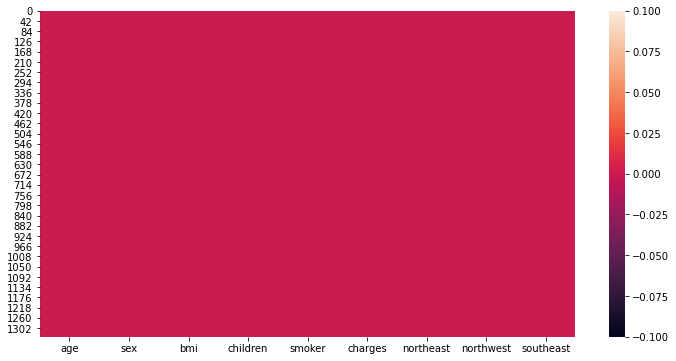

In [68]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())

In [39]:
#Droping the duplicate values
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


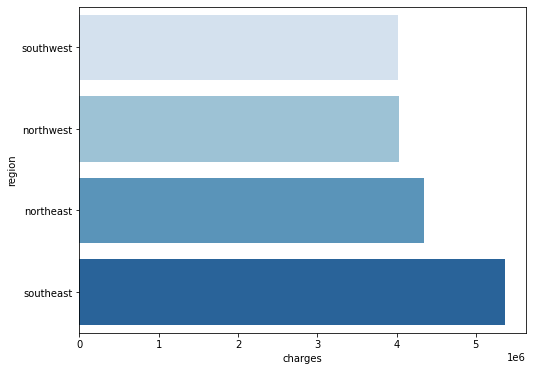

In [40]:
#In this graph we are calculating the sum of all the charges based on the regions
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

Text(0.5, 1.0, 'countplot of age based on sex')

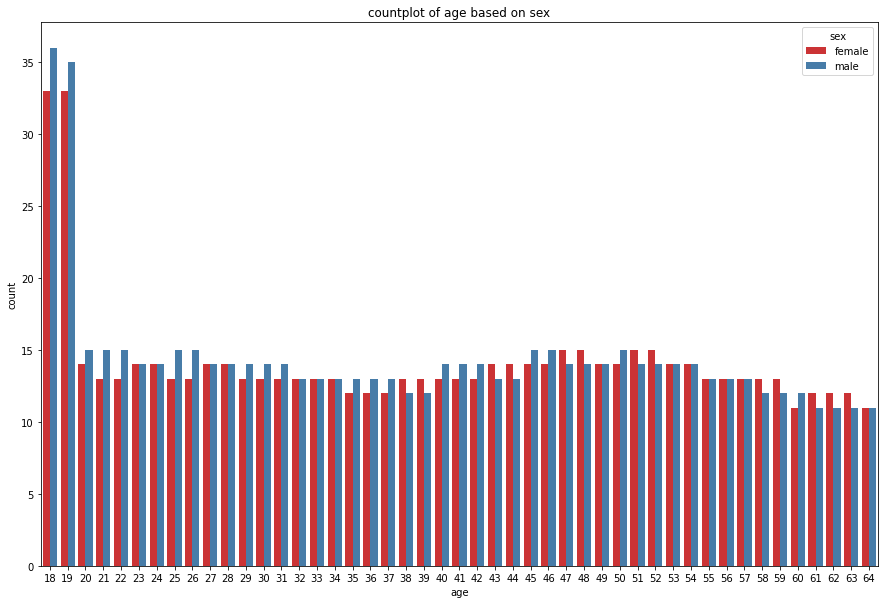

In [41]:
#In this graph we are counting the age based on the sex
f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.countplot(x='age',hue='sex',data=data,palette="Set1")
plt.title('countplot of age based on sex')

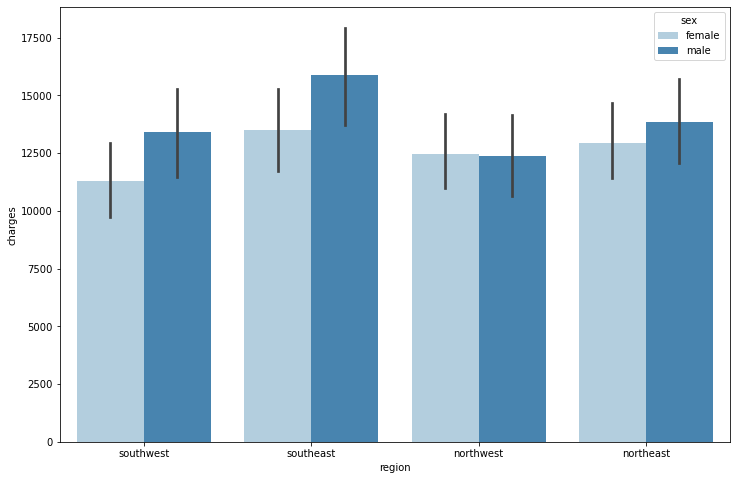

In [42]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='Blues')

In [43]:
#As sex and smoker are categorical applied labelEncoder to convert to numerical
label = LabelEncoder()
data['sex']= label.fit_transform(data['sex'])
data['smoker'] = label.fit_transform(data['smoker'])

In [44]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [45]:
#appling one hot encoding to convert the categorical to numerical
var= pd.get_dummies(data['region'])

In [46]:
var

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [47]:
#Appending the one hot encoded value to the original dataframe
data[['northeast','northwest','southeast']]=var[['northeast','northwest','southeast']]

In [48]:
data=data.drop('region',axis=1)

In [49]:
#as other column standarized between 0 and 1 so converting age,bmi in the range
sc = StandardScaler()
data[['age','bmi']]=sc.fit_transform(data[['age','bmi']])

In [50]:
#Seperating the features and label
x=data.drop('charges',axis=1)
y=data['charges']

In [51]:
model = pca()
out = model.fit_transform(x)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [52]:
#this line of code help to find out the most important features
out['topfeat']

,PC,feature,loading,type
0,PC1,children,0.990041,best
1,PC2,bmi,0.746496,best
2,PC3,age,-0.756540,best
3,PC4,sex,0.948056,best
4,PC5,northwest,0.707734,best
5,PC6,southeast,0.797614,best
6,PC7,smoker,0.972811,best
7,PC8,northeast,-0.584207,best


so observing the above table 0,1,3,4,5,6 are the important feature that we can consider while modeling

In [53]:
x = data.drop(['age','northeast'],axis=1)

In [54]:
#Spliting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [55]:
#Applying the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [56]:
#Predicting on the test data
predict = model.predict(x_test)

In [59]:
#Calculating mse,rmse and r2
print(mean_squared_error(y_test, predict))
print(math.sqrt(mean_squared_error(y_test, predict)))
print(r2_score(y_test,predict))

8.169823192421671e-24
2.8582902568531543e-12
1.0


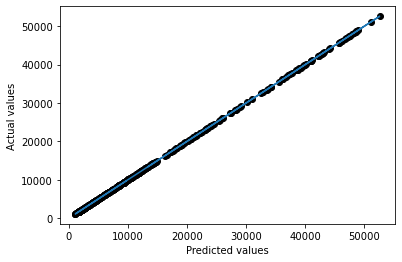

In [67]:
plt.scatter(predict,y_test,  color='black')
plt.plot(y_test,predict)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()